**Mengimpor Dependensi**

In [12]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import math
import platform
import random
import os

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.6.9
Tensorflow version: 2.2.0
Keras version: 2.3.0-tf


**Menyiapkan Dataset**

In [13]:
# melakukan download file dalam bentuk zip
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-17 02:50:54--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.92MB/s    in 53s     

2020-07-17 02:51:48 (5.81 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [14]:
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [15]:
os.listdir('/tmp/rockpaperscissors')

['train',
 'val',
 'README_rpc-cv-images.txt',
 'rock',
 'scissors',
 'rps-cv-images',
 'paper']

In [16]:
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [17]:
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [18]:
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [19]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

if not os.path.isdir(train_dir):
    os.mkdir(train_dir)

if not os.path.isdir(validation_dir):
    os.mkdir(validation_dir)

**Split Dataset**

In [20]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [21]:
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)

In [22]:
print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

total training rock images: 726
total training paper images: 712
total training scissors images: 750


**Image Data Generator**

In [23]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [24]:
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [25]:
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

580

In [26]:
len(os.listdir('/tmp/rockpaperscissors/val/rock'))

146

In [27]:
len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

600

In [28]:
len(os.listdir('/tmp/rockpaperscissors/val/scissors'))

150

In [29]:
len(os.listdir('/tmp/rockpaperscissors/train/paper'))

569

**Augmentasi Gambar**

In [30]:
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')


In [31]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


**Model CNN**

In [32]:
# membuat model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

**Optimizer**

In [33]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])


**Image Data Generator**

In [34]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 39s - loss: 1.0619 - accuracy: 0.4462 - val_loss: 0.8357 - val_accuracy: 0.6687
Epoch 2/20
25/25 - 39s - loss: 0.6737 - accuracy: 0.7376 - val_loss: 0.3186 - val_accuracy: 0.8750
Epoch 3/20
25/25 - 42s - loss: 0.3633 - accuracy: 0.8859 - val_loss: 0.3378 - val_accuracy: 0.9125
Epoch 4/20
25/25 - 38s - loss: 0.2539 - accuracy: 0.9062 - val_loss: 0.1865 - val_accuracy: 0.9312
Epoch 5/20
25/25 - 38s - loss: 0.2384 - accuracy: 0.9202 - val_loss: 0.2468 - val_accuracy: 0.9500
Epoch 6/20
25/25 - 38s - loss: 0.2057 - accuracy: 0.9366 - val_loss: 0.1070 - val_accuracy: 0.9563
Epoch 7/20
25/25 - 38s - loss: 0.1293 - accuracy: 0.9600 - val_loss: 0.1734 - val_accuracy: 0.9438
Epoch 8/20
25/25 - 38s - loss: 0.1279 - accuracy: 0.9556 - val_loss: 0.2628 - val_accuracy: 0.9250
Epoch 9/20
25/25 - 38s - loss: 0.1187 - accuracy: 0.9683 - val_loss: 0.1494 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 38s - loss: 0.1024 - accuracy: 0.9658 - val_loss: 0.0765 - val_accuracy: 0.9688
Epoch 11/

**Visualisasi Data**

Using TensorFlow backend.


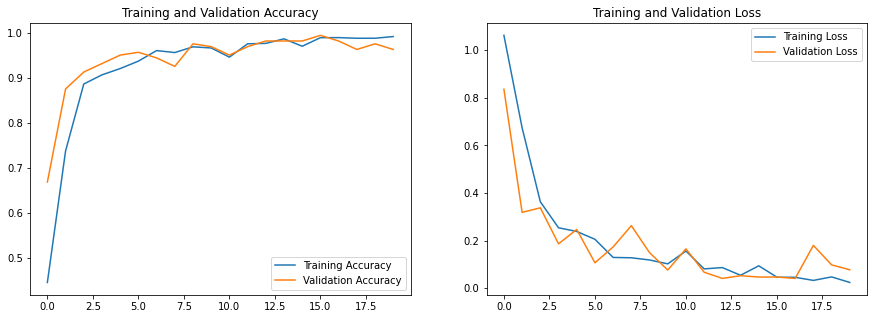

In [35]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Augmentasi Gambar**

Saving 3n4i3lKB3nZOpDVv.png to 3n4i3lKB3nZOpDVv.png
3n4i3lKB3nZOpDVv.png
scissors


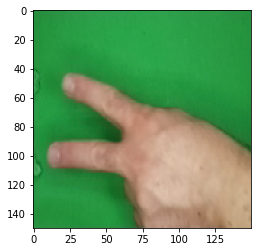

In [39]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')